In [1]:
import pandas as pd
import numpy as np
import git
from datetime import datetime as dt
from vehicle_stream_pipeline import utils
from vehicle_stream_pipeline.utils import feasibility_analysis as fa
from vehicle_stream_pipeline.utils import ride_simulation as rs
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


# Gather Data Raw
* MoD Stops = used to gather stop id's
* Mod Routes = used as edgelist for graph data
* rides_df = original MoD Rides Data
* sim_df_small = simualted Rides Data = count of datapoints equals original data
* sim_df_large = simualted Rides Data = 2 million Datapoints to sample from 

In [2]:
repo = git.Repo(".", search_parent_directories=True).git.rev_parse("--show-toplevel")

# MoD Stops and Routes information
df_stops = pd.read_excel(
    f"{repo}/data/other/MoDstops+Preismodell.xlsx", sheet_name="MoDstops"
)
df_edges = pd.read_excel(
    f"{repo}/data/other/MoDstops+Preismodell.xlsx", sheet_name="Liste 2022"
)
df_edges.rename(columns={"Start #": "start_id", "Ende #": "end_id"}, inplace=True)

# Rides Data 
rides_df = pd.read_csv(f"{repo}/data/cleaning/data_cleaned.csv")
rides_df = rides_df[(rides_df["state"] == "completed")]
rides_df["scheduled_to"] = pd.to_datetime(rides_df["scheduled_to"])

sim_df = pd.read_csv(f"{repo}/data/simulated/sim_rides_2m.csv")
sim_df_2 = pd.read_csv(f"{repo}/data/simulated/sim_rides_200k.csv")

C:\Users\jostm7\AppData\Local\Temp/ipykernel_19440/3765787776.py:13: DtypeWarning: Columns (50,51,52,53,54,55,56,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  rides_df = pd.read_csv(f"{repo}/data/cleaning/data_cleaned.csv")


# Visualizations
1. Set globale Parameters
2. Transform Data to formats of different Graphs

In [3]:
# color_rides = 'green'
color_rides = 'darkblue'
# color_rides_sim = 'lightsteelblue'
color_rides_sim = 'seagreen'
color_rides_sim_s_2 = 'cornflowerblue'
color_rides_sim_l = 'navy'
color_sequence = [color_rides, color_rides_sim]

In [21]:
# Data for Distplots
dist_df = rs.transformForDist(rides_df,"Original Rides")
dist_df_sim = rs.transformForDist(sim_df,"Simulated Rides")
dist_df_sim_2 = rs.transformForDist(sim_df_2,"Simulated Rides")

# dataframe for Boxplot
boxplot_df = pd.concat([dist_df, dist_df_sim])

# dataframe for Piechart Route Visualization
df_value_counts_rides = rs.transformForRoute(dist_df, "Original Rides")
df_value_counts_sim = rs.transformForRoute(
    dist_df_sim, "Simulated Rides"
)
known_route = (
    df_value_counts_sim["route"]
    .loc[df_value_counts_sim["route"].isin(df_value_counts_rides["route"])]
    .count()
)
unknown_route = (
    df_value_counts_sim["route"]
    .loc[~df_value_counts_sim["route"].isin(df_value_counts_rides["route"])]
    .count()
)

# dataframe for Barchart Route Visualization
top_df = rs.transformForBar(10, df_value_counts_rides, df_value_counts_sim)

c:\Users\jostm7\AppData\Local\Programs\Python\Python39\lib\site-packages\vehicle_stream_pipeline\utils\ride_simulation.py:1306: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df_sim_l["own_top_n"] = top_df_sim_l["route"].apply(


## Daily Distrbution

c:\Users\jostm7\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


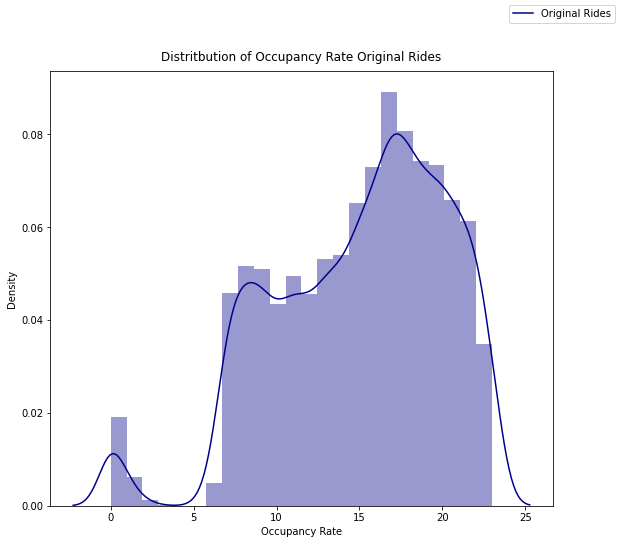

In [5]:
current_attribute = 'hour'
axlabel = 'Occupancy Rate'

fig = plt.figure(figsize=(9, 8))
sns.distplot(dist_df[current_attribute], color=color_rides, bins=24, hist_kws={'alpha': 0.4},axlabel=axlabel)

plt.title("Distritbution of Occupancy Rate Original Rides", pad = 10)
fig.legend(labels=['Original Rides'])

plt.show()

c:\Users\jostm7\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\jostm7\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


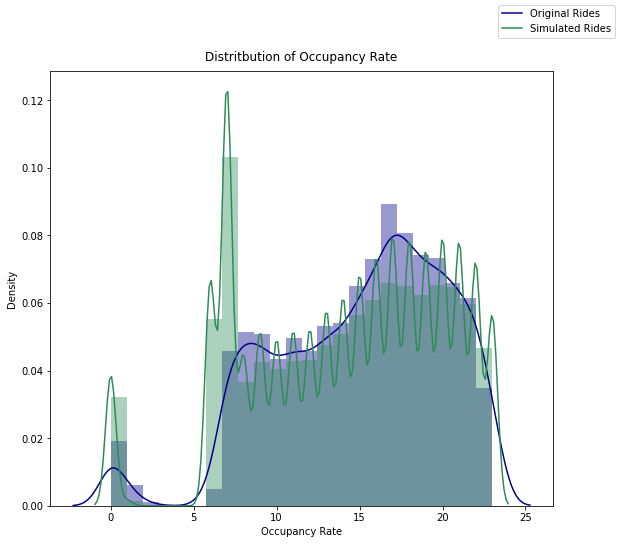

In [6]:
current_attribute = 'hour'
axlabel = 'Occupancy Rate'

fig = plt.figure(figsize=(9, 8))
sns.distplot(dist_df[current_attribute], color=color_rides, bins=24, hist_kws={'alpha': 0.4},axlabel=axlabel)
sns.distplot(dist_df_sim[current_attribute], color=color_rides_sim, bins=24, hist_kws={'alpha': 0.4},axlabel=axlabel)

plt.title("Distritbution of Occupancy Rate", pad = 10)
fig.legend(labels=['Original Rides','Simulated Rides'])

plt.show()

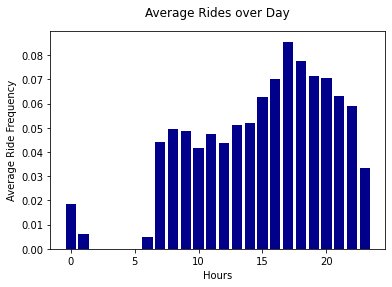

In [7]:
dist_df_filt = dist_df[(dist_df['hour']<2) | (dist_df['hour']>5)]

grouped_data_hour= dist_df_filt['hour'].value_counts(normalize=True).sort_index()
plt.bar(grouped_data_hour.index,grouped_data_hour,color=color_rides)

plt.title("Average Rides over Day",pad=15)
plt.xlabel("Hours")
plt.ylabel("Average Ride Frequency")

plt.show()

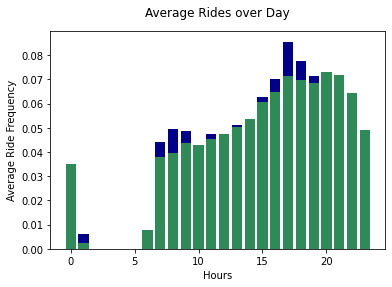

In [8]:
grouped_data_hour= dist_df_filt['hour'].value_counts(normalize=True).sort_index()
plt.bar(grouped_data_hour.index,grouped_data_hour,color=color_rides)

grouped_data_hour= dist_df_sim_2['hour'].value_counts(normalize=True).sort_index()
plt.bar(grouped_data_hour.index,grouped_data_hour,color=color_rides_sim)

plt.title("Average Rides over Day",pad=15)
plt.xlabel("Hours")
plt.ylabel("Average Ride Frequency")

plt.show()

## Weekly Distribution

c:\Users\jostm7\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


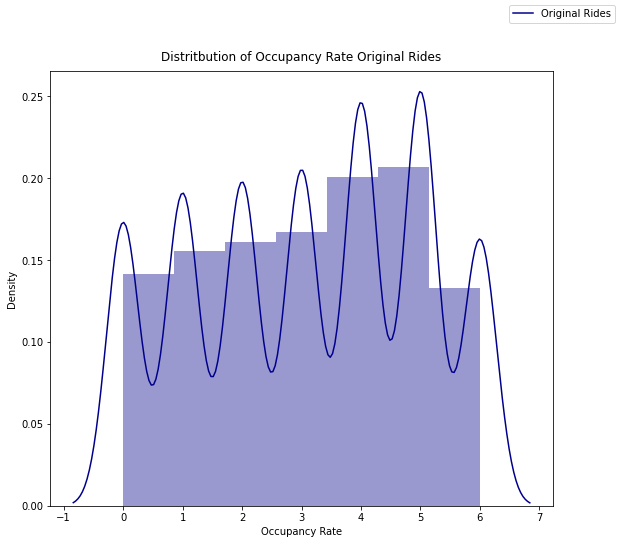

In [9]:
current_attribute = 'day_of_week'
axlabel = 'Occupancy Rate'

fig = plt.figure(figsize=(9, 8))
sns.distplot(dist_df[current_attribute], color=color_rides, bins=7, hist_kws={'alpha': 0.4},axlabel=axlabel)

plt.title("Distritbution of Occupancy Rate Original Rides", pad = 10)
fig.legend(labels=['Original Rides'])

plt.show()

c:\Users\jostm7\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\jostm7\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


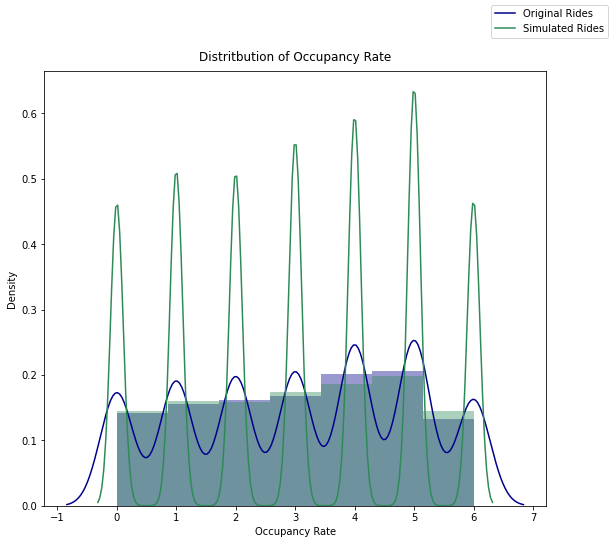

In [10]:
current_attribute = 'day_of_week'
axlabel = 'Occupancy Rate'

fig = plt.figure(figsize=(9, 8))
sns.distplot(dist_df[current_attribute], color=color_rides, bins=7, hist_kws={'alpha': 0.4},axlabel=axlabel)
sns.distplot(dist_df_sim[current_attribute], color=color_rides_sim, bins=7, hist_kws={'alpha': 0.4},axlabel=axlabel)

plt.title("Distritbution of Occupancy Rate", pad = 10)
fig.legend(labels=['Original Rides','Simulated Rides'])

plt.show()

## Original Rides Development

<function matplotlib.pyplot.show(close=None, block=None)>

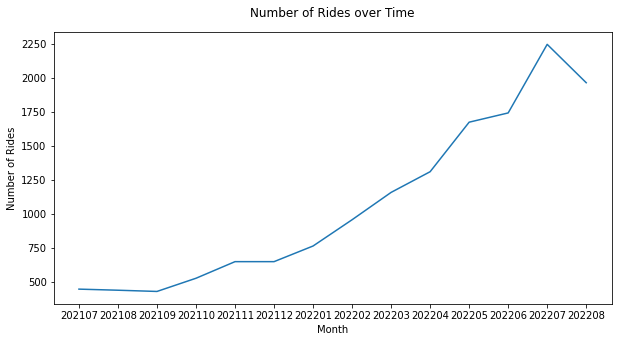

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(dist_df['month_year'].value_counts().sort_index())

plt.title("Number of Rides over Time",pad = 15)
plt.xlabel("Month")
plt.ylabel("Number of Rides")

plt.show

## Boxplots for times of rides data

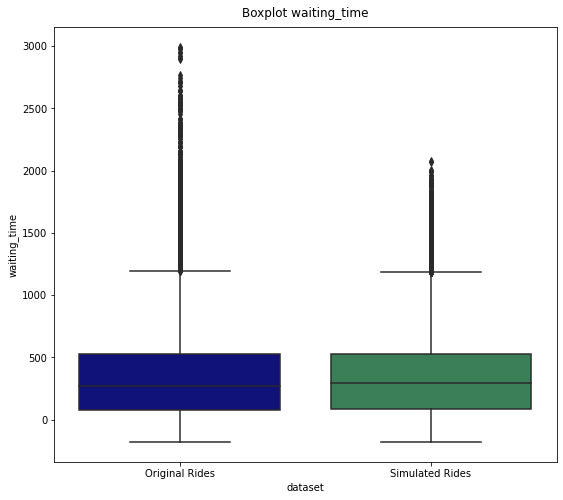

In [12]:
current_attribute = 'waiting_time'

fig = plt.figure(figsize=(9,8))
sns.boxplot(data=boxplot_df, x ="dataset",y=current_attribute,palette=color_sequence)

plt.title(f"Boxplot {current_attribute}", pad = 10)

plt.show()

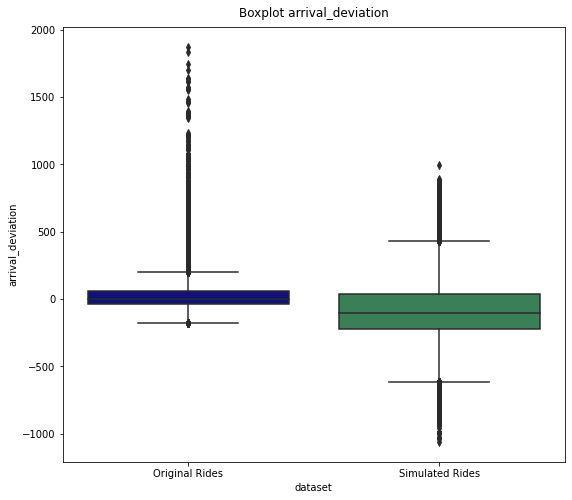

In [13]:
current_attribute = 'arrival_deviation'

fig = plt.figure(figsize=(9,8))
sns.boxplot(data=boxplot_df, x ="dataset",y=current_attribute,palette=color_sequence)

plt.title(f"Boxplot {current_attribute}", pad = 10)

plt.show()

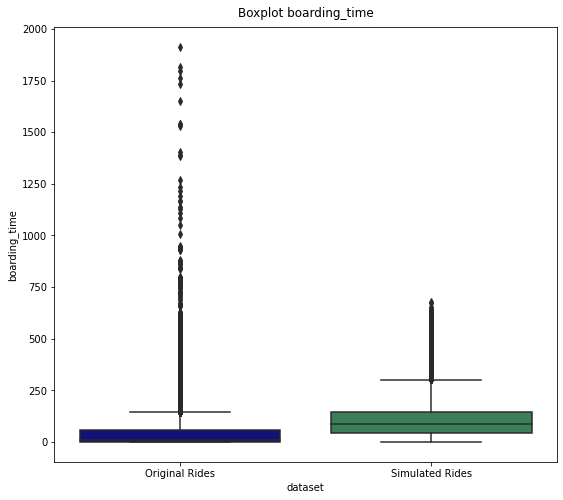

In [14]:
current_attribute = 'boarding_time'

fig = plt.figure(figsize=(9,8))
sns.boxplot(data=boxplot_df, x ="dataset",y=current_attribute,palette=color_sequence)

plt.title(f"Boxplot {current_attribute}", pad = 10)

plt.show()

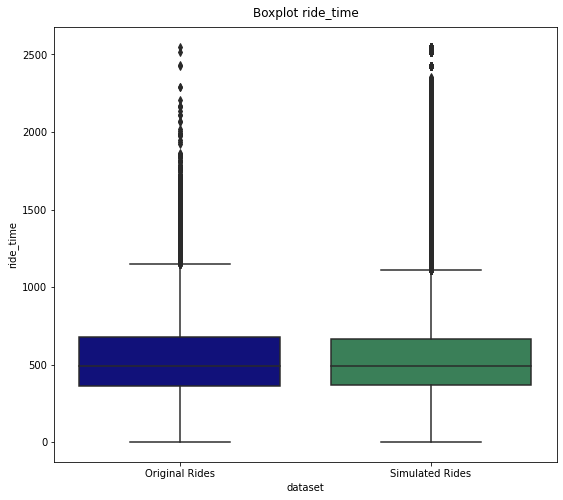

In [15]:
current_attribute = 'ride_time'

fig = plt.figure(figsize=(9,8))
sns.boxplot(data=boxplot_df, x ="dataset",y=current_attribute,palette=color_sequence)

plt.title(f"Boxplot {current_attribute}", pad = 10)

plt.show()

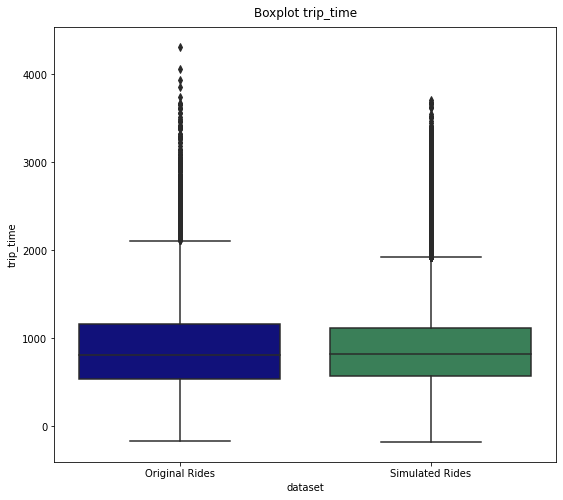

In [16]:
current_attribute = 'trip_time'

fig = plt.figure(figsize=(9,8))
sns.boxplot(data=boxplot_df, x ="dataset",y=current_attribute,palette=color_sequence)

plt.title(f"Boxplot {current_attribute}", pad = 10)

plt.show()

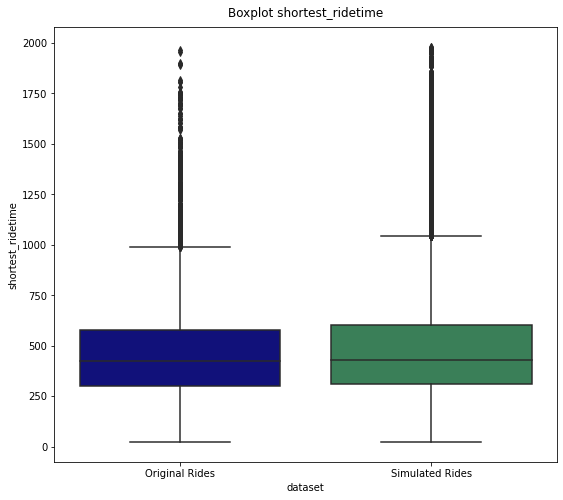

In [17]:
current_attribute = 'shortest_ridetime'

fig = plt.figure(figsize=(9,8))
sns.boxplot(data=boxplot_df, x ="dataset",y=current_attribute,palette=color_sequence)

plt.title(f"Boxplot {current_attribute}", pad = 10)

plt.show()

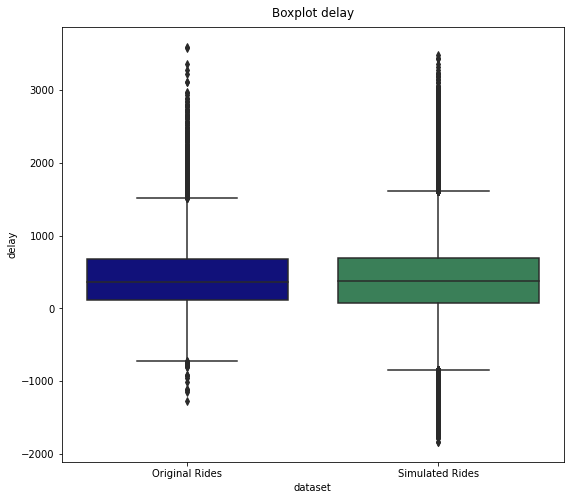

In [18]:
current_attribute = 'delay'

fig = plt.figure(figsize=(9,8))
sns.boxplot(data=boxplot_df, x ="dataset",y=current_attribute,palette=color_sequence)

plt.title(f"Boxplot {current_attribute}", pad = 10)

plt.show()

## Picked Simulated Routes comparison

### 1. Pie Chart

ValueError: too many values to unpack (expected 2)

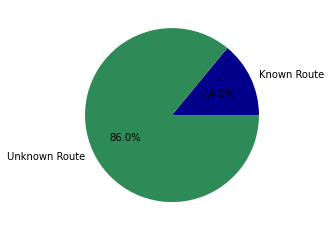

In [22]:

labels = ["Known Route","Unknown Route"]
values = [known_route,unknown_route]
fig, ax = plt.pie(values,labels = labels,colors=color_sequence,autopct='%1.1f%%')

plt.title(f"Simulated Routes for {len(sim_df)} Rides")

### 2. Top Original 10 Routes frequencys

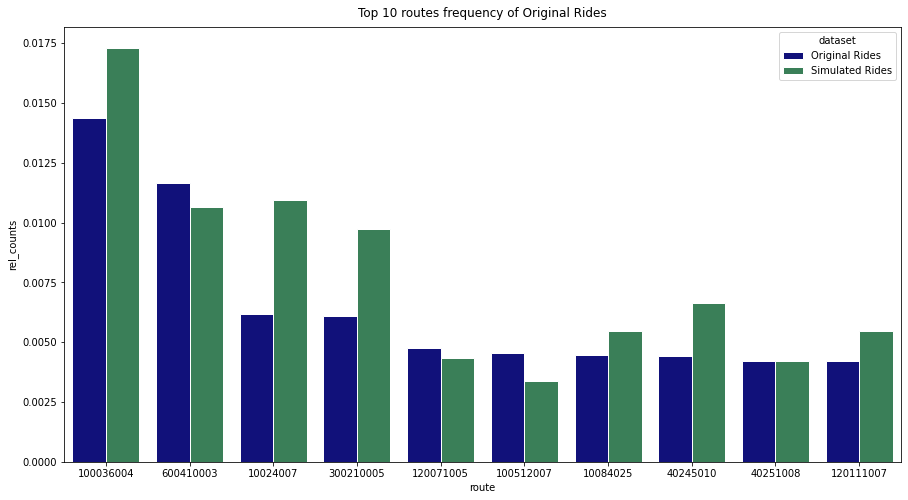

In [23]:
fig = plt.figure(figsize=(15,8))
sns.barplot(x = 'route', y = 'rel_counts', hue = 'dataset', data = top_df, palette = color_sequence, edgecolor = 'w')
plt.title(f"Top 10 routes frequency of Original Rides", pad = 10)

plt.show()

In [162]:
column_list = error_df.columns.to_list()

correct_count = 0

for column in column_list:
    column_count = len(error_df[error_df[column] == 'Correct'])
    correct_count = column_count + column_count

print(correct_count)

37960


In [164]:
orig_inconsistencies_df = inconsistencies_df.iloc[:,0:44]
orig_inconsistencies_df.shape

(18980, 44)